<a href="https://colab.research.google.com/github/teethavattcp/teethavat_data_sci_port/blob/main/Projects/02_Churn_Prediction_%26_Retention_Strategies_for_Telecom_Business/Churn_Prediction_%26_Retention_Strategies_04_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction and Retention Strategies for Telecom business**

##Chapter 3: Process

# 3.1) Importing Data & Exploring Data

In [ ]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## 3.1.1) Importing Data

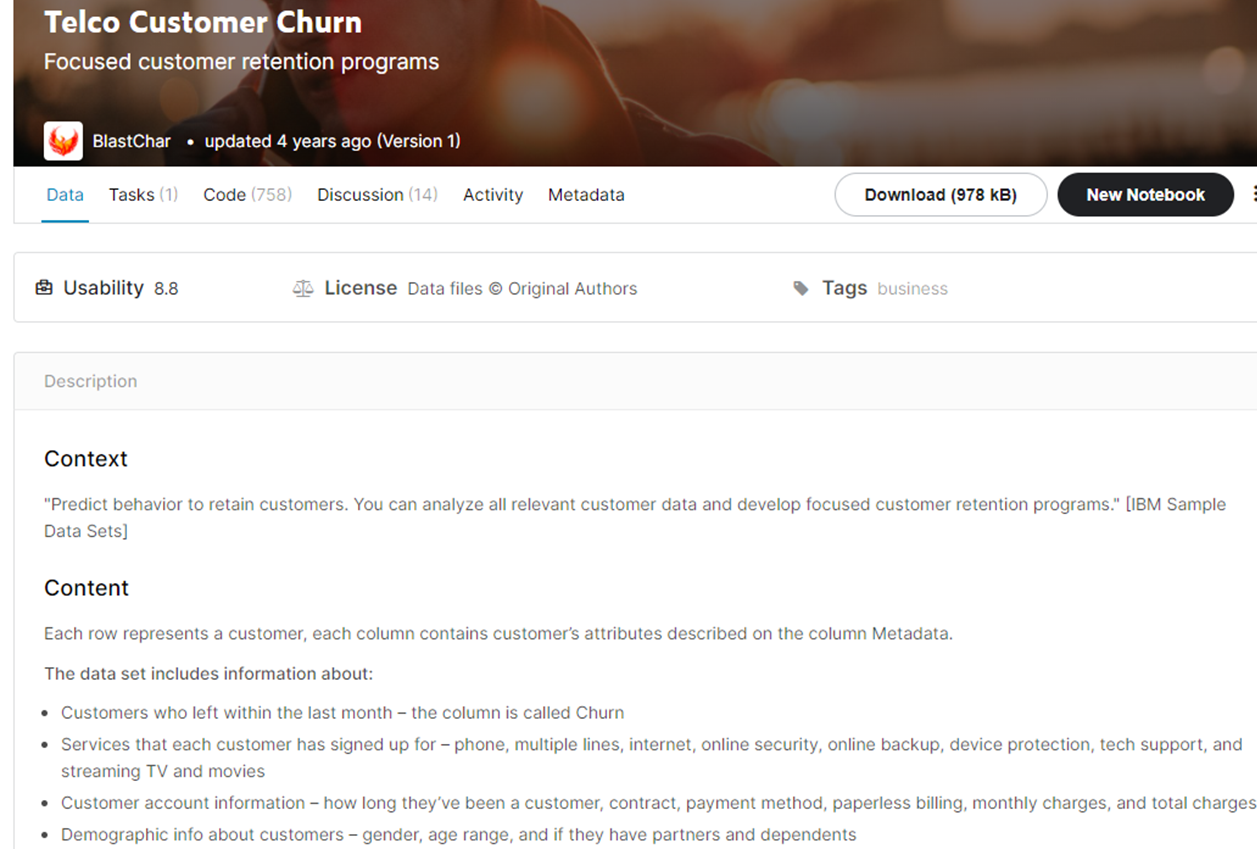

https://drive.google.com/file/d/1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl/view?usp=sharing

In [ ]:
!gdown https://drive.google.com/uc?id=1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl

Downloading...
From: https://drive.google.com/uc?id=1TLAIfXtAw5kqurUf9U7JYn-OyDD7EVkl
To: /content/watson.csv
100% 978k/978k [00:00<00:00, 133MB/s]


In [ ]:
df = pd.read_csv('watson.csv', header=0, delimiter=",")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 3.1.2) Exploring Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data type of `'TotalCharges'` seem suspricious as it should be continuous(float64).

In [ ]:
for col in df.columns:
    print ("-------- %s --------" % col)
    print (df[col].value_counts())

-------- customerID --------
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
-------- gender --------
Male      3555
Female    3488
Name: gender, dtype: int64
-------- SeniorCitizen --------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------- Partner --------
No     3641
Yes    3402
Name: Partner, dtype: int64
-------- Dependents --------
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------- tenure --------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------- PhoneService --------
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------- MultipleLines --------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------- Internet

No duplication of `'customerID'`

No     5174
Yes    1869
Name: Churn, dtype: int64

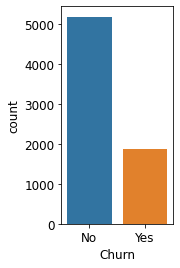

In [ ]:
plt.rcParams.update({'font.size': 12})
fig_dims = (2, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Churn',data=df, ax=ax)
df['Churn'].value_counts()

Classes in target attribute are imbalance then stratify sampling should be used for spliting data in buiding classification model.

# 3.2) Data Preprocessing for predictive task models

## 3.2.1) Handling missing data

Converting 'TotalCharges' from categorical data to numeric data

In [ ]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
list(df['TotalCharges'].sort_values(ascending = True))[0:20]

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05']

### Set invalid parsing as null value

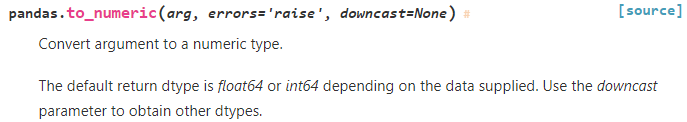

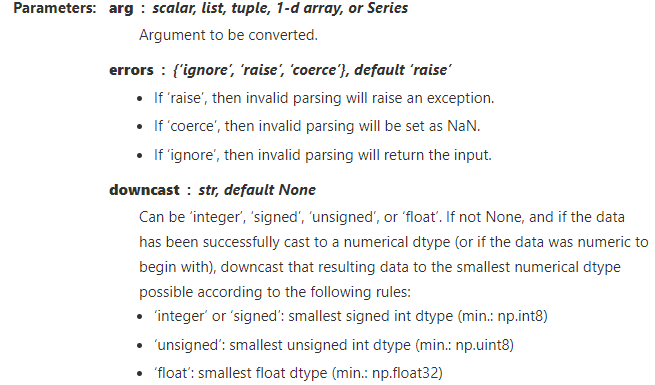

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

### Substitute nulls with mean

In [ ]:
df['TotalCharges'].mean()

2283.3004408418656

In [ ]:
df.TotalCharges = df.TotalCharges.fillna(df['TotalCharges'].mean())
df['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
20.050000       8
19.900000       8
               ..
6849.400000     1
692.350000      1
130.150000      1
3211.900000     1
6844.500000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df['TotalCharges'].describe()

count    7043.000000
mean     2283.300441
std      2265.000258
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


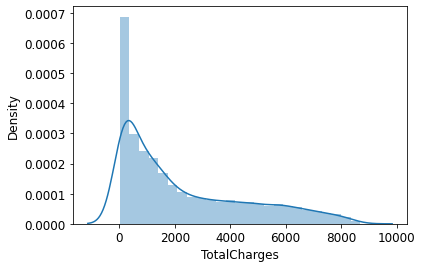

In [ ]:
sns.distplot(df['TotalCharges'])

In [ ]:
df_cl = df.copy(deep = True)

## 3.2.2) Converting categorical variable to dummy variable by one-hot Encoding

In [ ]:
for col in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']:
  df = pd.concat([df,pd.get_dummies(df[col],drop_first=False, prefix=col)],axis=1)
  df.drop([col],axis=1,inplace=True)
df.drop('Churn_No',axis=1,inplace=True)
df.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880,0.265370
std,0.368612,24.559481,30.090047,2265.000258,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3.2.3) Data field Reduction

### Eliminate insignificant datafields

In [ ]:
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7039,2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
7040,4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
7041,8361-LTMKD,1,4,74.40,306.60,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,1


Assign `index = 'customerID'` for later being used to join in generating association rules mining after clustering that what customerID belongs to which cluster

ใช้ `index = 'customerID'` เพื่อเก็บไว้ join ตอนทำ clustering ว่ามี ID อะไรบ้างที่อยู่ในแต่ละคลัสเตอร์ (join กันทีหลัง)

In [ ]:
df_cf = df.copy(deep = True)
df_cf.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


สร้าง dataframe ใหม่เพื่อไว้ใช้สำหรับ classification โดยทำการ drop id เพื่อไว้ใช้สำหรับเรียกดูชื่อลูกค้าที่มีผลการทำนายตามคลาสของตัวแปรเป้าหมาย

In [ ]:
df_cf.drop('customerID',axis=1,inplace=True)

In [ ]:
df.set_index('customerID', inplace = True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2234-XADUH,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4801-JZAZL,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df_cf

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1


# 3.3) Generating classification models

In [ ]:
from sklearn.model_selection import train_test_split
X = df_cf.drop('Churn_Yes',axis=1)
y = df_cf['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=2565)

In [ ]:
import time
start = time.time()

## 3.3.5) K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Hyperparameter Tuning KNeighborsClassifier

knn =  KNeighborsClassifier(n_jobs=-1)

from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_neighbors': list(range(1, 101, 2)), 'weights': ['uniform', 'distance']}
]

grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro', n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...],
                          'weights': ['uniform', 'distance']}],
             scoring='f1_macro')

In [ ]:
grid_search_knn.best_estimator_

KNeighborsClassifier(n_jobs=-1, n_neighbors=21, weights='distance')

In [ ]:
clf_knn = grid_search_knn.best_estimator_.fit(X_train, y_train)

In [ ]:
y_pred_knn = clf_knn.predict(X_test) # predict class

In [ ]:
# Classification Report KNeighborsClassifier
from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test,y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1035
           1       0.62      0.41      0.49       374

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409



In [ ]:
# Confusion Metrix KNeighborsClassifier
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_knn))

Confusion Matrix:
[[939  96]
 [220 154]]


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
print('K-Nearest Neighbors')
print('F1-score = ', f1_score(y_test, y_pred_knn, average='macro'))
print('Accuracy = ', accuracy_score(y_test, y_pred_knn,))

K-Nearest Neighbors
F1-score =  0.6747802865624197
Accuracy =  0.7757274662881476


In [ ]:
stop = time.time()
print("The time of the run:", stop - start)

The time of the run: 110.64956474304199
